In [54]:
# ### Part 1: Understanding Product Categories

# **Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

# 1. **Frequency Tables**:
#     - Generate a frequency table for the product `category`.
#     - Which are the top 5 most listed product categories?

# 

# ---

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#%matplotlib inline ##this is telling the notebook that if we are plotting something with matplotlib it will 
## output the chart in the output section and not in a pop-up window
import pandas as pd
df = pd.read_csv("/Users/martinoalonso/Documents/Anaconda/Labs/Lab 4/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")


In [2]:
df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
df.shape

(2443651, 9)

In [5]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [9]:
# 1. **Frequency Tables**:
#     - Generate a frequency table for the product `category`.
#     - Which are the top 5 most listed product categories?

# Frequency table for 'MSZoning'
frequency_table = df['category'].value_counts().sort_values(ascending=False)
top_5_categories = frequency_table.head(5)
top_5_categories



Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: category, dtype: int64

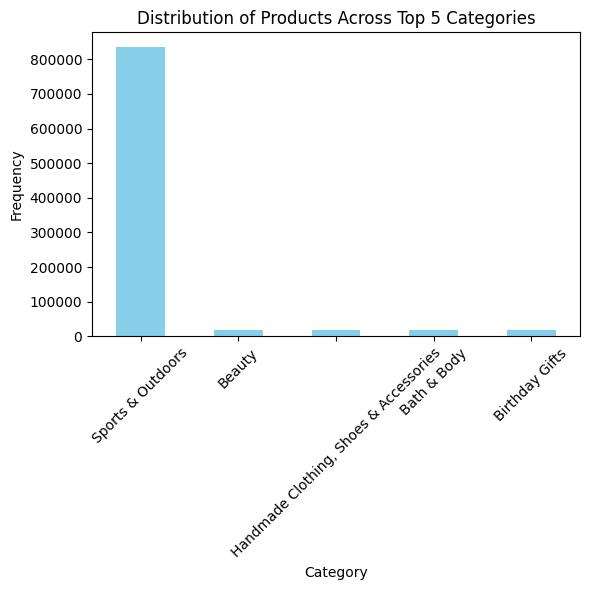

In [12]:
#2. **Visualizations**:
#     2.1. - Display the distribution of products across different categories using a bar chart. *If you face problems 
# understanding the chart, do it for a subset of top categories.*


import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(6, 6))
top_5_categories.plot(kind='bar', color='skyblue')
plt.title('Distribution of Products Across Top 5 Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

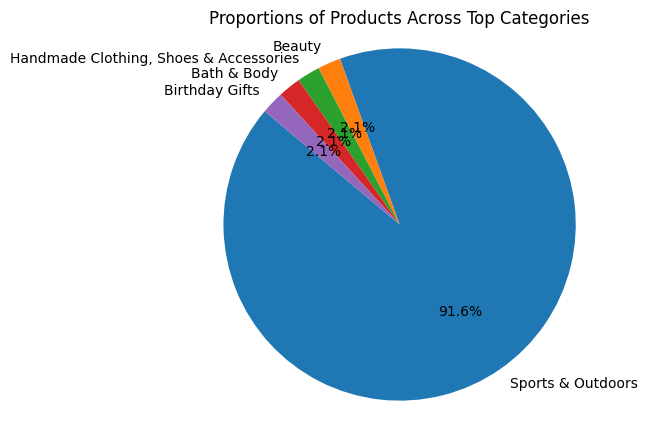

In [14]:
## 2.2. # - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate
# the listings?

# Assuming you have already computed the frequency table
# If not, replace 'frequency_table' with your computed frequency table
top_categories_subset = frequency_table.head(5)  # Example: consider top 5 categories

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(top_categories_subset, labels=top_categories_subset.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportions of Products Across Top Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [15]:

# ### Part 2: Delving into Product Pricing

# **Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

# 2.1. **Measures of Centrality**:
#     - Calculate the mean, median, and mode for the `price` of products.
#     - What's the average price point of products listed? How does this compare with the most common price point (mode)?

# 2.2. **Measures of Dispersion**:
#     - Determine the variance, standard deviation, range, and interquartile range for product `price`.
#     - How varied are the product prices? Are there any indicators of a significant spread in prices?

def central_tendency(dataframe):
    mean = dataframe.mean()
    median = dataframe.median()
    mode = dataframe.mode()
    variance = dataframe.var()
    sd = variance**0.5
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Variance: {variance}")
    print(f"Standard deviation: {sd}")

central_tendency(df['price'])

## Since the mean ($89.24) is considerably higher than the mode ($9.99), it implies that there might be a right-skewed 
# distribution. This means that there could be some relatively high-priced outliers pulling the mean higher than the 
# most frequently occurring price.

##The variance and standard deviation values indicate that there is a significant spread in prices. 
# The standard deviation of approximately $345.61 suggests that prices vary considerably from the mean of $89.24. 
# This variability could indicate a wide range of prices for the products in your dataset.

Mean: 89.24380943923663
Median: 19.09
Mode: 0    9.99
Name: price, dtype: float64
Variance: 119445.48532254907
Standard deviation: 345.60886175349884


In [25]:
df.groupby(['category'])['price'].mean().sort_values(ascending=False)

category
Laptops                  1087.987827
3D Printers              1018.036129
Desktop PCs               926.816064
Home Office Furniture     622.135898
Test & Measurement        559.382973
                            ...     
Bedding Accessories         8.835220
Adapters                    8.750197
Signs & Plaques             8.275136
Arts & Crafts               8.182523
Office Paper Products       7.047684
Name: price, Length: 296, dtype: float64

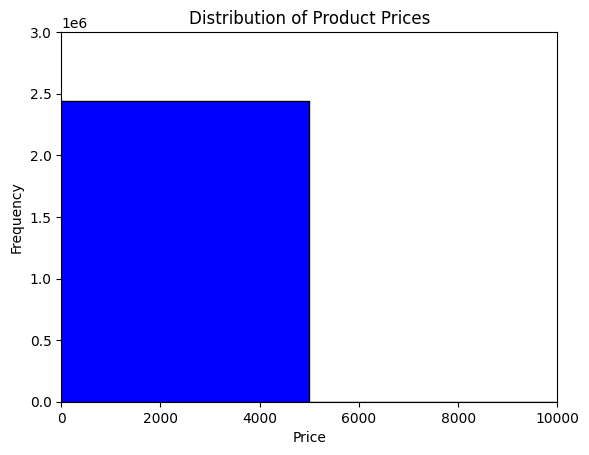

In [51]:
# 2.3. **Visualizations**:
#     - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product 
# prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.



plt.hist(df['price'], bins=20, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices')
plt.xlim(0, 10000)
plt.ylim(0, 3000000)
# Show plot
plt.show()

##Prices are concentrated in one range but there are other value prices in the data that don't appear in the graph

<Axes: ylabel='price'>

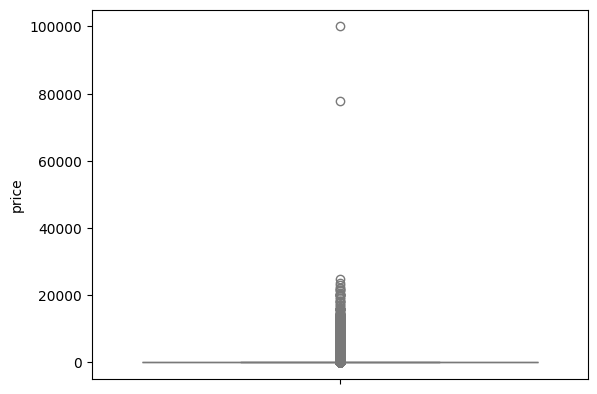

In [57]:
#     - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread 
# and potential outliers in product pricing. 

sns.boxplot(data = df['price'], color="lightblue")


In [59]:
# ### Part 3: Unpacking Product Ratings

# **Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

# 1. **Measures of Centrality**:
#     - Calculate the mean, median, and mode for the `rating` of products.
#     - How do customers generally rate products? Is there a common trend?

# 2. **Measures of Dispersion**:
#     - Determine the variance, standard deviation, and interquartile range for product `rating`.
#     - Are the ratings consistent, or is there a wide variation in customer feedback?

central_tendency(df['stars'])

Mean: 2.152836472966065
Median: 0.0
Mode: 0    0.0
Name: stars, dtype: float64
Variance: 4.817434029796862
Standard deviation: 2.1948653785134207


In [63]:
count = (df['stars'] == 0).sum()
count

#There are 1225641 values 0 in the column

1225641

In [69]:
##dropping the 0

df['stars2'] = df['stars'][df['stars'] != 0]
central_tendency(df['stars2'])

Mean: 4.319160762226909
Median: 4.4
Mode: 0    4.5
Name: stars2, dtype: float64
Variance: 0.30834337523872846
Standard deviation: 0.555286750462073


In [72]:
# 3. **Shape of the Distribution**:
#     - Calculate the skewness and kurtosis for the `rating` column. 
#     - Are the ratings normally distributed, or do they lean towards higher or lower values?

skewness_price = round(df['stars'].skew(),2)
kurtosis_price = round(df['stars'].kurtosis(),2)

print(f"The skewness is {skewness_price}, and the kurtosis is {kurtosis_price}")

#The distribution is slightly right skewed, the kurtosis of -1.93 means that the curve has thinner tails than the normal
# distribution, pointing to less extreme values (platykurtic distribution). 

The skewness is 0.08, and the kurtosis is -1.93


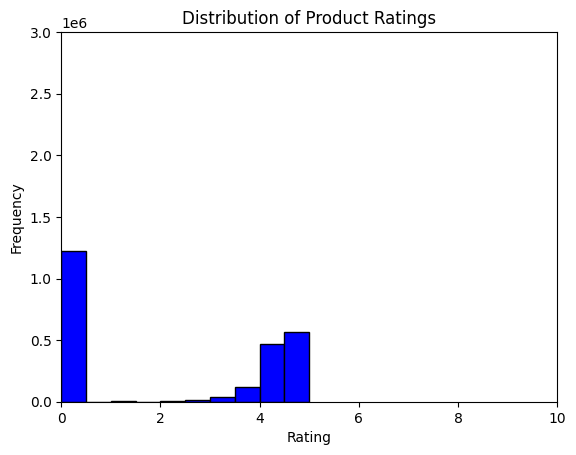

In [76]:
# 4. **Visualizations**:
#     - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

plt.hist(df['stars'], bins=10, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Product Ratings')
plt.xlim(0, 10)
plt.ylim(0, 3000000)
# Show plot
plt.show()

#Ratings of 1 are more common